In [1]:
import sys
import numpy as np
import seaborn as sb                                    # 데이터 시각화를 위한 모듈
from pandas import read_excel                           # 엑셀 데이터를 가져오기 위한 모듈
from matplotlib import pyplot as plt                    # 그래프 그리기 위한 모듈

from sklearn.linear_model import LinearRegression       # 선형회귀분석 모듈
from sklearn.model_selection import train_test_split    # 훈련/검증 데이터 분리 모듈

In [5]:
origin = read_excel('fish.xlsx')
origin = origin[["길이", "무게"]]
origin.head()

,길이,무게
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


In [6]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False


In [9]:
# 독립변수, 종속변수 분리
x_data = origin[["길이"]]
y_data = origin[["무게"]]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [12]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

print("y = {0:.2f} * X + {1:.2f}".format(fit.coef_[0][0], fit.intercept_[0]))


계수:  [[37.01288998]]
절편:  [-636.25427098]
검증 데이터 설명력:  0.933893451951942
y = 37.01 * X + -636.25


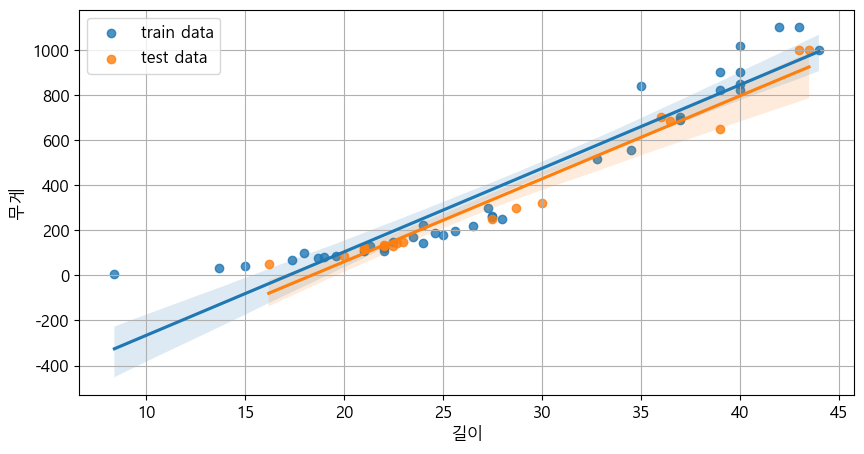

In [13]:
plt.figure(figsize=(10, 5))

# 원본 데이터 전체
# sb.regplot(data=origin, x="길이", y="무게")

# 학습에 사용된 데이터만으로 산점도 그래프 그리기
sb.regplot(x=x_train['길이'], y=y_train['무게'], label='train data')
# 검정 데이터만로 산점도 그래프 그리기
sb.regplot(x=x_test['길이'], y=y_test['무게'], label='test data')

plt.legend()
plt.grid()
plt.show()
plt.close()


### 04. 과적합
#### 과소적합(underfitting)
분석 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 경우

모델이 단순하다는 의미는 변수(피처)의 수가 부족함을 의미함

해결방법
- 모델 파라미터가 더 많은 모델을 선택 (단순선형회귀 -> 다항회귀)
- 학습 알고리즘에 더 좋은 특성을 제공
>결국은 변수를 늘리라는 뜻

#### 과대적합
훈련 데이터에 있는 잠음의 양이 모델에 비해 너무 복잡한 경우

설명력에 비해 잔차가 큰 경우라 할 수 있다.


해결방법
- 파라미터 수가 적은 모델을 선택
- 훈련 데이터의 특성 수를 줄임
- 모델을 단순화 시킴
>   결국은 변수를 줄이라는 뜻

- 훈련 데이터의 잡음을 줄임
> 이상치 제거

### 05. 다항회귀(단일피쳐 다항회귀, 곡선회귀)
데이터에 잘 맞는 일차 함수나 직선을 구하는 게 아니라 다항식이나 곡선을 구해서 학습하는 방법

하나의 입력 변수에 대하여 차수를 확장하여 다차원 회귀 모델을 도출한다.

훈련 데이터의 독립변수 추가

In [14]:
x_train['길이^2'] = x_train['길이'] ** 2
x_train.head()

,길이,길이^2
8,19.6,384.16
0,8.4,70.56
15,22.0,484.00
26,24.6,605.16
51,42.0,1764.00


검증 데이터의 독립변수 추가

In [15]:
x_test['길이^2'] = x_test['길이'] ** 2
x_test.head()

,길이,길이^2
16,22.0,484.00
12,21.0,441.00
21,22.7,515.29
33,27.5,756.25
36,30.0,900.00


In [16]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

print("y = {0:.2f} * X + {1:.2f}".format(fit.coef_[0][0], fit.intercept_[0]))


계수:  [[-23.92139238   1.06707967]]
절편:  [143.06821268]
훈련 데이터 설명력:  0.9741164053383603
검증 데이터 설명력:  0.9608757319315258
y = -23.92 * X + 143.07


7.0 46.0


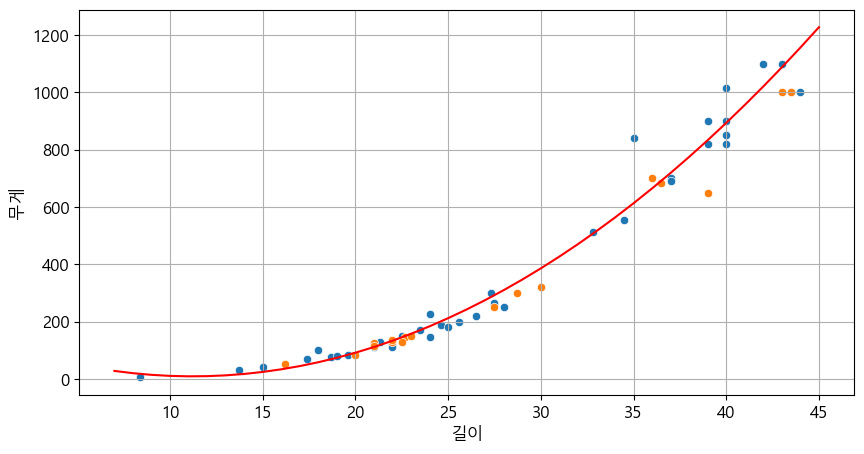

In [17]:
plt.figure(figsize=(10, 5))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = plt.xlim()
print(xmin.round(), xmax.round())
xrange = np.arange(xmin.round(), xmax.round(), 1)
#print(xrange)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]
#print(y_pred)

sb.scatterplot(x=x_test['길이'], y=y_test['무게'])
sb.lineplot(x=xrange, y=y_pred, color='red')

plt.grid()
plt.show()
plt.close()